**Problem Statement:**

The SuperStore company is a global retail company with a large customer base. In light of the Christmas and New Year holidays, the Marketing department wants to run marketing campaigns to express gratitude to customers who have supported the company over time. They also want to identify and engage potential customers to turn them into loyal customers.

However, the Marketing department hasn't yet segmented the customers for this year because the dataset is too large to handle manually, unlike in previous years. They are seeking support from the Data Analysis department to implement a customer segmentation task for each customer segment, allowing them to deploy tailored marketing programs for each customer group.

The Marketing Director has also proposed using an RFM (Recency, Frequency, Monetary) model. However, in the past, when the company was smaller in scale, the team could calculate and categorize customers using Excel. Given the current large volume of data, they are hoping that the Data department can create a segmentation strategy using Python programming to assess customer segments and aid in campaign deployment.

**Steps for RFM analysis:**

**1. Import necessary library**

**2. Exploratory Data Analysis:**
    
   1. **Overvỉew the data:**Taking an overview of the data types, the number of columns, and the number of data rows to see if there is a need to change data types to align with the analysis, is it necessary?

   2. **Detect and solve missing values:** Check if there are any missing values in the data, and determine whether these missing values impact the analysis results or not.
   3. **Detect and solve outlier values:** Check if there are any outlier values in the data and assess whether these outlier values impact the analysis results or not.

**3. Preparing data for RFM Analysis**

**4. Calculate RFM metric**

**Recency:** For each customer group, when was the most recent purchase made?

**Frequency:**
What is the frequency of purchases for each customer group?

**Monetary:** How much revenue does each customer group generate?

**5. Customer segmentation base on RFM score**


Grouping customers based on RFM scores:

1. ***Champions:***The customers who have made the most recent purchases, most frequent purchases, and spent the most.

2.   ***Loyal customers:*** Frequent buyers who are often interested in promotional campaigns.

3. ***Potential loyalist:***
Customers who have recent activity with average frequency.

4. ***New/Recent customers:*** Most recent buyers but not frequent shoppers.

5. ***Promising:***
Those who have shopped recently but haven't spent much.

6. ***Needs attention:*** The value of the most recent purchase, frequency, and monetary value are around average. It's possible that they haven't made a purchase very recently.

7. ***About to sleep:*** Frequency and recent frequency are below average. These customers might churn if there are no actions to re-engage them.

8. ***At risk:*** Customers who haven't made a purchase in a long time and need to be encouraged to start shopping again.

9. ***Can’t lose them:***
Frequent buyers who haven't returned for a while.
10. ***Hibernating:*** Last purchase was a long time ago, and the number of orders is low. They may be at risk of churn.

11. ***Lost***: Customers who have already churned/left us.

**6. RFM Analysis and Customer segmentation visualization**

**7. Suggest recommendation for marketing team to target customers in campaign**


# 1. Import necessary library

In [2]:
from google.colab import drive
drive.mount('/content/gdrive', force_remount = True)

Mounted at /content/gdrive


In [3]:
import numpy as np
import pandas as pd
import datetime as dt
import matplotlib.pyplot as plt
import seaborn as sns

#2. Exploratory Data Analysis

## Exploratory

In [11]:
order_table = pd.read_excel("/content/gdrive/MyDrive/K15_Vu_Anh_Duy_RFM_analysis_project/Dataset.xlsx", sheet_name='Orders')

In [13]:
return_table = pd.read_excel("/content/gdrive/MyDrive/K15_Vu_Anh_Duy_RFM_analysis_project/Dataset.xlsx", sheet_name='Return')

In [12]:
print(order_table.shape)
order_table.head(10)

(9994, 12)


,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Channel,Postal Code,Product ID,Sales,Quantity,Unit Cost
0,646,CA-2017-126221,2017-12-30,2018-01-05,Standard Class,CC-12430,Home Office,47201,OFF-AP-10002457,209.300,2,76.3945
1,907,CA-2017-143259,2017-12-30,2018-01-03,Standard Class,PO-18865,Consumer,10009,FUR-BO-10003441,323.136,4,77.7546
2,908,CA-2017-143259,2017-12-30,2018-01-03,Standard Class,PO-18865,Consumer,10009,TEC-PH-10004774,90.930,7,12.6003
3,909,CA-2017-143259,2017-12-30,2018-01-03,Standard Class,PO-18865,Consumer,10009,OFF-BI-10003684,52.776,3,10.9950
4,1297,CA-2017-115427,2017-12-30,2018-01-03,Standard Class,EB-13975,Corporate,94533,OFF-BI-10002103,13.904,2,4.6926
5,1298,CA-2017-115427,2017-12-30,2018-01-03,Standard Class,EB-13975,Corporate,94533,OFF-BI-10004632,20.720,2,7.1225
6,5092,CA-2017-156720,2017-12-30,2018-01-03,Standard Class,JM-15580,Consumer,80538,OFF-FA-10003472,3.024,3,1.2096
7,1878,CA-2017-118885,2017-12-29,2018-01-02,Standard Class,JG-15160,Consumer,90049,FUR-CH-10002880,393.568,4,109.4611
8,1879,CA-2017-118885,2017-12-29,2018-01-02,Standard Class,JG-15160,Consumer,90049,TEC-PH-10002563,302.376,3,93.2326
9,2875,US-2017-102638,2017-12-29,2017-12-31,First Class,MC-17845,Consumer,10035,OFF-FA-10002988,6.030,3,1.0251


In [14]:
order_table.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   Row ID       9994 non-null   int64         
 1   Order ID     9994 non-null   object        
 2   Order Date   9994 non-null   datetime64[ns]
 3   Ship Date    9994 non-null   datetime64[ns]
 4   Ship Mode    9994 non-null   object        
 5   Customer ID  9994 non-null   object        
 6   Channel      9994 non-null   object        
 7   Postal Code  9994 non-null   int64         
 8   Product ID   9994 non-null   object        
 9   Sales        9994 non-null   float64       
 10  Quantity     9994 non-null   int64         
 11  Unit Cost    9994 non-null   float64       
dtypes: datetime64[ns](2), float64(2), int64(3), object(5)
memory usage: 937.1+ KB


In [15]:
order_table.describe()

,Row ID,Postal Code,Sales,Quantity,Unit Cost
count,9994.000000,9994.000000,9994.000000,9994.000000,9994.000000
mean,4997.500000,55190.379428,229.858001,3.789574,53.120197
std,2885.163629,32063.693350,623.245101,2.225110,122.251398
min,1.000000,1040.000000,0.444000,1.000000,0.544500
25%,2499.250000,23223.000000,17.280000,2.000000,3.473600
50%,4997.500000,56430.500000,54.490000,3.000000,12.933600
75%,7495.750000,90008.000000,209.940000,5.000000,54.522000
max,9994.000000,99301.000000,22638.480000,14.000000,4074.926400


In [16]:
print(return_table.shape)
return_table.head(10)

(296, 2)


,Returned,Order ID
0,Yes,CA-2017-153822
1,Yes,CA-2017-129707
2,Yes,CA-2014-152345
3,Yes,CA-2015-156440
4,Yes,US-2017-155999
5,Yes,CA-2014-157924
6,Yes,CA-2017-131807
7,Yes,CA-2016-124527
8,Yes,CA-2017-135692
9,Yes,CA-2014-123225


In [17]:
return_table.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 296 entries, 0 to 295
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Returned  296 non-null    object
 1   Order ID  296 non-null    object
dtypes: object(2)
memory usage: 4.8+ KB


In [18]:
return_table.describe()

,Returned,Order ID
count,296,296
unique,1,296
top,Yes,CA-2017-153822
freq,296,1


## Clean data

### Check missing data

In [19]:
order_table.isnull().sum()

Row ID         0
Order ID       0
Order Date     0
Ship Date      0
Ship Mode      0
Customer ID    0
Channel        0
Postal Code    0
Product ID     0
Sales          0
Quantity       0
Unit Cost      0
dtype: int64

In [20]:
return_table.isnull().sum()

Returned    0
Order ID    0
dtype: int64

###Check outlier value

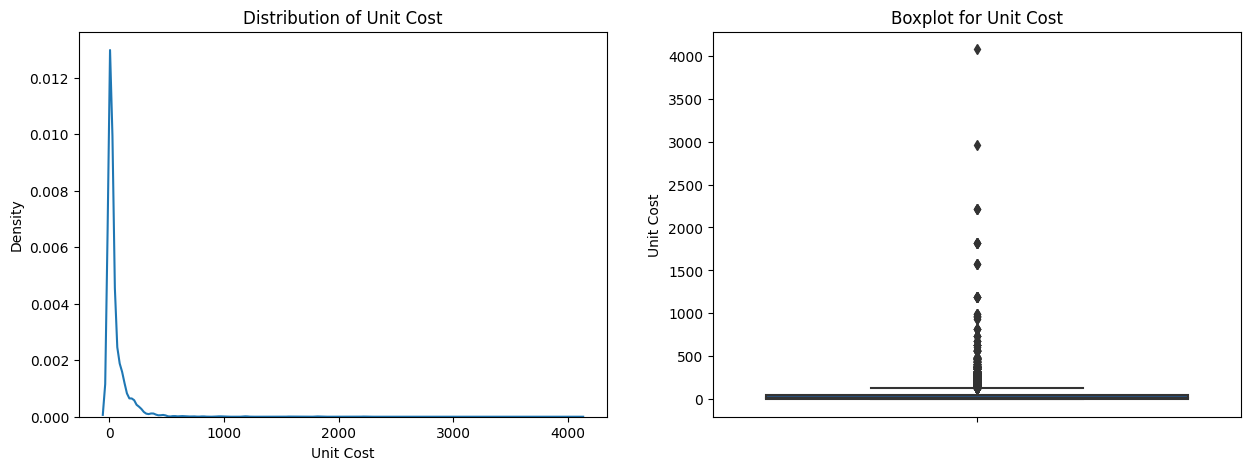

In [21]:
fig, axes = plt.subplots(1, 2, figsize = (15, 5))
sns.kdeplot(order_table["Unit Cost"], ax = axes[0]).set_title("Distribution of Unit Cost")
sns.boxplot(y = order_table["Unit Cost"], ax = axes[1], color = "#195190").set_title("Boxplot for Unit Cost")
plt.show()

In [22]:
# determine minimum and maximum of data for assign outlier
q_minimum = order_table['Unit Cost'].quantile(0.0015)
q_maximum = order_table['Unit Cost'].quantile(0.9985)
print("With Unit Cost, the range of not outlier values are between " + str(q_minimum) + " and " + str(q_maximum) + ". Any value outside of these ranges should be considered outliers.")

With Unit Cost, the range of not outlier values are between 0.6572 and 1189.9932. Any value outside of these ranges should be considered outliers.


In [24]:
# assign outlier as q_minimum and q_maximum
order_table['Unit Cost_no outlier'] = np.where(order_table['Unit Cost'] > q_maximum,q_maximum, order_table['Unit Cost'])
order_table['Unit Cost_no outlier'] = np.where(order_table['Unit Cost'] < q_minimum,q_minimum, order_table['Unit Cost'])
print(order_table.shape)
order_table.head(30)

(9994, 13)


,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Channel,Postal Code,Product ID,Sales,Quantity,Unit Cost,Unit Cost_no outlier
0,646,CA-2017-126221,2017-12-30,2018-01-05,Standard Class,CC-12430,Home Office,47201,OFF-AP-10002457,209.3000,2,76.3945,76.3945
1,907,CA-2017-143259,2017-12-30,2018-01-03,Standard Class,PO-18865,Consumer,10009,FUR-BO-10003441,323.1360,4,77.7546,77.7546
2,908,CA-2017-143259,2017-12-30,2018-01-03,Standard Class,PO-18865,Consumer,10009,TEC-PH-10004774,90.9300,7,12.6003,12.6003
3,909,CA-2017-143259,2017-12-30,2018-01-03,Standard Class,PO-18865,Consumer,10009,OFF-BI-10003684,52.7760,3,10.9950,10.9950
4,1297,CA-2017-115427,2017-12-30,2018-01-03,Standard Class,EB-13975,Corporate,94533,OFF-BI-10002103,13.9040,2,4.6926,4.6926
5,1298,CA-2017-115427,2017-12-30,2018-01-03,Standard Class,EB-13975,Corporate,94533,OFF-BI-10004632,20.7200,2,7.1225,7.1225
6,5092,CA-2017-156720,2017-12-30,2018-01-03,Standard Class,JM-15580,Consumer,80538,OFF-FA-10003472,3.0240,3,1.2096,1.2096
7,1878,CA-2017-118885,2017-12-29,2018-01-02,Standard Class,JG-15160,Consumer,90049,FUR-CH-10002880,393.5680,4,109.4611,109.4611
8,1879,CA-2017-118885,2017-12-29,2018-01-02,Standard Class,JG-15160,Consumer,90049,TEC-PH-10002563,302.3760,3,93.2326,93.2326
9,2875,US-2017-102638,2017-12-29,2017-12-31,First Class,MC-17845,Consumer,10035,OFF-FA-10002988,6.0300,3,1.0251,1.0251


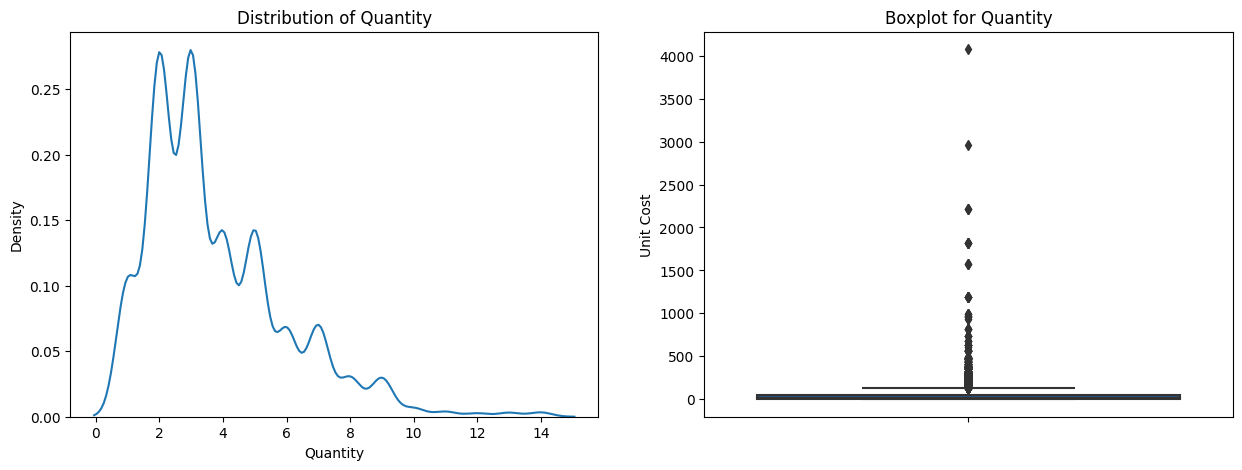

In [25]:
fig, axes = plt.subplots(1, 2, figsize = (15, 5))
sns.kdeplot(order_table["Quantity"], ax = axes[0]).set_title("Distribution of Quantity")
sns.boxplot(y = order_table["Unit Cost"], ax = axes[1], color = "#195190").set_title("Boxplot for Quantity")
plt.show()

In [26]:
# determine minimum and maximum of data for assign outlier
q_minimum = order_table['Quantity'].quantile(0.0015)
q_maximum = order_table['Quantity'].quantile(0.9985)
print("With Unit Cost, the range of not outlier values are between " + str(q_minimum) + " and " + str(q_maximum) + ". Any value outside of these ranges should be considered outliers.")

With Unit Cost, the range of not outlier values are between 1.0 and 14.0. Any value outside of these ranges should be considered outliers.


In [27]:
# assign outlier as q_minimum and q_maximum
order_table['Quantity_no outlier'] = np.where(order_table['Quantity'] > q_maximum,q_maximum, order_table['Quantity'])
order_table['Quantity_no outlier'] = np.where(order_table['Quantity'] < q_minimum,q_minimum, order_table['Quantity'])
print(order_table.shape)
order_table.head(30)


(9994, 14)


,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Channel,Postal Code,Product ID,Sales,Quantity,Unit Cost,Unit Cost_no outlier,Quantity_no outlier
0,646,CA-2017-126221,2017-12-30,2018-01-05,Standard Class,CC-12430,Home Office,47201,OFF-AP-10002457,209.3000,2,76.3945,76.3945,2.0
1,907,CA-2017-143259,2017-12-30,2018-01-03,Standard Class,PO-18865,Consumer,10009,FUR-BO-10003441,323.1360,4,77.7546,77.7546,4.0
2,908,CA-2017-143259,2017-12-30,2018-01-03,Standard Class,PO-18865,Consumer,10009,TEC-PH-10004774,90.9300,7,12.6003,12.6003,7.0
3,909,CA-2017-143259,2017-12-30,2018-01-03,Standard Class,PO-18865,Consumer,10009,OFF-BI-10003684,52.7760,3,10.9950,10.9950,3.0
4,1297,CA-2017-115427,2017-12-30,2018-01-03,Standard Class,EB-13975,Corporate,94533,OFF-BI-10002103,13.9040,2,4.6926,4.6926,2.0
5,1298,CA-2017-115427,2017-12-30,2018-01-03,Standard Class,EB-13975,Corporate,94533,OFF-BI-10004632,20.7200,2,7.1225,7.1225,2.0
6,5092,CA-2017-156720,2017-12-30,2018-01-03,Standard Class,JM-15580,Consumer,80538,OFF-FA-10003472,3.0240,3,1.2096,1.2096,3.0
7,1878,CA-2017-118885,2017-12-29,2018-01-02,Standard Class,JG-15160,Consumer,90049,FUR-CH-10002880,393.5680,4,109.4611,109.4611,4.0
8,1879,CA-2017-118885,2017-12-29,2018-01-02,Standard Class,JG-15160,Consumer,90049,TEC-PH-10002563,302.3760,3,93.2326,93.2326,3.0
9,2875,US-2017-102638,2017-12-29,2017-12-31,First Class,MC-17845,Consumer,10035,OFF-FA-10002988,6.0300,3,1.0251,1.0251,3.0


#3. Preparing Data for RFM Analysis

In [28]:
final_table_RFM = order_table.merge(return_table, on = 'Order ID',how = 'left')
final_table_RFM

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Channel,Postal Code,Product ID,Sales,Quantity,Unit Cost,Unit Cost_no outlier,Quantity_no outlier,Returned
0,646,CA-2017-126221,2017-12-30,2018-01-05,Standard Class,CC-12430,Home Office,47201,OFF-AP-10002457,209.300,2,76.3945,76.3945,2.0,NaN
1,907,CA-2017-143259,2017-12-30,2018-01-03,Standard Class,PO-18865,Consumer,10009,FUR-BO-10003441,323.136,4,77.7546,77.7546,4.0,NaN
2,908,CA-2017-143259,2017-12-30,2018-01-03,Standard Class,PO-18865,Consumer,10009,TEC-PH-10004774,90.930,7,12.6003,12.6003,7.0,NaN
3,909,CA-2017-143259,2017-12-30,2018-01-03,Standard Class,PO-18865,Consumer,10009,OFF-BI-10003684,52.776,3,10.9950,10.9950,3.0,NaN
4,1297,CA-2017-115427,2017-12-30,2018-01-03,Standard Class,EB-13975,Corporate,94533,OFF-BI-10002103,13.904,2,4.6926,4.6926,2.0,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9989,1760,CA-2014-141817,2014-01-05,2014-01-12,Standard Class,MB-18085,Consumer,19143,OFF-AR-10003478,19.536,3,4.8840,4.8840,3.0,NaN
9990,740,CA-2014-112326,2014-01-04,2014-01-08,Standard Class,PO-19195,Home Office,60540,OFF-LA-10003223,11.784,3,2.5041,2.5041,3.0,NaN
9991,741,CA-2014-112326,2014-01-04,2014-01-08,Standard Class,PO-19195,Home Office,60540,OFF-ST-10002743,272.736,3,112.5036,112.5036,3.0,NaN
9992,742,CA-2014-112326,2014-01-04,2014-01-08,Standard Class,PO-19195,Home Office,60540,OFF-BI-10004094,3.540,2,4.5135,4.5135,2.0,NaN


In [29]:
# Take order ID without return
final_table_RFM_no_return= final_table_RFM[final_table_RFM['Returned'].isnull()]
final_table_RFM_no_return

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Channel,Postal Code,Product ID,Sales,Quantity,Unit Cost,Unit Cost_no outlier,Quantity_no outlier,Returned
0,646,CA-2017-126221,2017-12-30,2018-01-05,Standard Class,CC-12430,Home Office,47201,OFF-AP-10002457,209.300,2,76.3945,76.3945,2.0,NaN
1,907,CA-2017-143259,2017-12-30,2018-01-03,Standard Class,PO-18865,Consumer,10009,FUR-BO-10003441,323.136,4,77.7546,77.7546,4.0,NaN
2,908,CA-2017-143259,2017-12-30,2018-01-03,Standard Class,PO-18865,Consumer,10009,TEC-PH-10004774,90.930,7,12.6003,12.6003,7.0,NaN
3,909,CA-2017-143259,2017-12-30,2018-01-03,Standard Class,PO-18865,Consumer,10009,OFF-BI-10003684,52.776,3,10.9950,10.9950,3.0,NaN
6,5092,CA-2017-156720,2017-12-30,2018-01-03,Standard Class,JM-15580,Consumer,80538,OFF-FA-10003472,3.024,3,1.2096,1.2096,3.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9989,1760,CA-2014-141817,2014-01-05,2014-01-12,Standard Class,MB-18085,Consumer,19143,OFF-AR-10003478,19.536,3,4.8840,4.8840,3.0,NaN
9990,740,CA-2014-112326,2014-01-04,2014-01-08,Standard Class,PO-19195,Home Office,60540,OFF-LA-10003223,11.784,3,2.5041,2.5041,3.0,NaN
9991,741,CA-2014-112326,2014-01-04,2014-01-08,Standard Class,PO-19195,Home Office,60540,OFF-ST-10002743,272.736,3,112.5036,112.5036,3.0,NaN
9992,742,CA-2014-112326,2014-01-04,2014-01-08,Standard Class,PO-19195,Home Office,60540,OFF-BI-10004094,3.540,2,4.5135,4.5135,2.0,NaN


In [30]:
final_table_RFM_no_return['TotalRevenue'] = final_table_RFM_no_return['Unit Cost_no outlier'] * final_table_RFM_no_return['Quantity_no outlier']
Current_date = dt.datetime(2017,12,31)
final_table_RFM_no_return

<ipython-input-30-a7ff848be137>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  final_table_RFM_no_return['TotalRevenue'] = final_table_RFM_no_return['Unit Cost_no outlier'] * final_table_RFM_no_return['Quantity_no outlier']


,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Channel,Postal Code,Product ID,Sales,Quantity,Unit Cost,Unit Cost_no outlier,Quantity_no outlier,Returned,TotalRevenue
0,646,CA-2017-126221,2017-12-30,2018-01-05,Standard Class,CC-12430,Home Office,47201,OFF-AP-10002457,209.300,2,76.3945,76.3945,2.0,NaN,152.7890
1,907,CA-2017-143259,2017-12-30,2018-01-03,Standard Class,PO-18865,Consumer,10009,FUR-BO-10003441,323.136,4,77.7546,77.7546,4.0,NaN,311.0184
2,908,CA-2017-143259,2017-12-30,2018-01-03,Standard Class,PO-18865,Consumer,10009,TEC-PH-10004774,90.930,7,12.6003,12.6003,7.0,NaN,88.2021
3,909,CA-2017-143259,2017-12-30,2018-01-03,Standard Class,PO-18865,Consumer,10009,OFF-BI-10003684,52.776,3,10.9950,10.9950,3.0,NaN,32.9850
6,5092,CA-2017-156720,2017-12-30,2018-01-03,Standard Class,JM-15580,Consumer,80538,OFF-FA-10003472,3.024,3,1.2096,1.2096,3.0,NaN,3.6288
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9989,1760,CA-2014-141817,2014-01-05,2014-01-12,Standard Class,MB-18085,Consumer,19143,OFF-AR-10003478,19.536,3,4.8840,4.8840,3.0,NaN,14.6520
9990,740,CA-2014-112326,2014-01-04,2014-01-08,Standard Class,PO-19195,Home Office,60540,OFF-LA-10003223,11.784,3,2.5041,2.5041,3.0,NaN,7.5123
9991,741,CA-2014-112326,2014-01-04,2014-01-08,Standard Class,PO-19195,Home Office,60540,OFF-ST-10002743,272.736,3,112.5036,112.5036,3.0,NaN,337.5108
9992,742,CA-2014-112326,2014-01-04,2014-01-08,Standard Class,PO-19195,Home Office,60540,OFF-BI-10004094,3.540,2,4.5135,4.5135,2.0,NaN,9.0270


In [31]:
segmentation_table = pd.read_excel("/content/gdrive/MyDrive/K15_Vu_Anh_Duy_RFM_analysis_project/Dataset.xlsx", sheet_name='Segmentation')
segmentation_table

,Segment,RFM Score
0,Champions,"555, 554, 544, 545, 454, 455, 445"
1,Loyal,"543, 444, 435, 355, 354, 345, 344, 335"
2,Potential Loyalist,"553, 551, 552, 541, 542, 533, 532, 531, 452, 4..."
3,New Customers,"512, 511, 422, 421, 412, 411, 311"
4,Promising,"525, 524, 523, 522, 521, 515, 514, 513, 425,42..."
5,Need Attention,"535, 534, 443, 434, 343, 334, 325, 324"
6,About To Sleep,"331, 321, 312, 221, 213, 231, 241, 251"
7,At Risk,"255, 254, 245, 244, 253, 252, 243, 242, 235, 2..."
8,Cannot Lose Them,"155, 154, 144, 214,215,115, 114, 113"
9,Hibernating customers,"332, 322, 233, 232, 223, 222, 132, 123, 122, 2..."


In [32]:
segmentation_table['RFM Score'] = segmentation_table['RFM Score'].str.split(',')
segmentation_table = segmentation_table.explode('RFM Score').reset_index(drop =True)
segmentation_table['RFM Score'] = segmentation_table['RFM Score'].astype(int)
segmentation_table.sort_values(by = 'RFM Score')
segmentation_table_edit = segmentation_table
segmentation_table_edit

,Segment,RFM Score
0,Champions,555
1,Champions,554
2,Champions,544
3,Champions,545
4,Champions,454
...,...,...
120,Lost customers,112
121,Lost customers,121
122,Lost customers,131
123,Lost customers,141


#4. Calculate RFM metric

In [33]:
rfm_data = final_table_RFM_no_return.groupby(['Customer ID']).agg({'Order Date': lambda x: (Current_date - x.max()).days ,
                                           'Order ID': lambda x: x.nunique(),
                                           'TotalRevenue': lambda x: x.sum()})

# Rename columns
rfm_data.rename(columns = {'Order Date' : 'Recency',
                      'Order ID' : 'Frequency',
                      'TotalRevenue' : 'Monetary'}, inplace = True)
# Sample RFM data
rfm_data.head()

,Recency,Frequency,Monetary
Customer ID,,,
AA-10315,185,5,5926.4425
AA-10375,20,9,779.0076
AA-10480,260,4,1354.6846
AA-10645,483,5,4222.3925
AB-10015,416,3,756.8095


In [34]:
#Building RFM segments
r_labels =range(5,0,-1)
f_labels=range(1,6)
m_labels=range(1,6)
r_quartiles = pd.qcut(rfm_data['Recency'], q=5, labels = r_labels)
f_quartiles = pd.qcut(rfm_data['Frequency'].rank(method = "first"),q=5, labels = f_labels)
m_quartiles = pd.qcut(rfm_data['Monetary'],q=5,labels = m_labels)
rfm_data = rfm_data.assign(R=r_quartiles,F=f_quartiles,M=m_quartiles)

In [35]:
rfm_data['RFM_Score'] = rfm_data['R'].astype(str) + rfm_data['F'].astype(str) + rfm_data['M'].astype(str)
rfm_data['RFM_Score'] = rfm_data['RFM_Score'].astype(int)
rfm_data.head()

,Recency,Frequency,Monetary,R,F,M,RFM_Score
Customer ID,,,,,,,
AA-10315,185,5,5926.4425,2,2,5,225
AA-10375,20,9,779.0076,5,5,2,552
AA-10480,260,4,1354.6846,2,1,2,212
AA-10645,483,5,4222.3925,1,2,5,125
AB-10015,416,3,756.8095,1,1,2,112


#5. Customer Segmentation base on RFM score

In [36]:
segmentation_table_edit

,Segment,RFM Score
0,Champions,555
1,Champions,554
2,Champions,544
3,Champions,545
4,Champions,454
...,...,...
120,Lost customers,112
121,Lost customers,121
122,Lost customers,131
123,Lost customers,141


In [38]:
RFM_score_table = rfm_data.merge(segmentation_table_edit, left_on = 'RFM_Score', right_on = 'RFM Score', how = 'inner')
RFM_score_table

,Recency,Frequency,Monetary,R,F,M,RFM_Score,Segment,RFM Score
0,185,5,5926.4425,2,2,5,225,At Risk,225
1,218,5,3922.8724,2,2,5,225,At Risk,225
2,150,4,3931.8170,2,2,5,225,At Risk,225
3,20,9,779.0076,5,5,2,552,Potential Loyalist,552
4,28,8,1093.1437,5,5,2,552,Potential Loyalist,552
...,...,...,...,...,...,...,...,...,...
786,387,7,1407.2390,1,4,3,143,At Risk,143
787,350,7,1341.7605,1,4,2,142,At Risk,142
788,338,5,2376.2016,1,3,4,134,At Risk,134
789,345,5,2558.0365,1,3,4,134,At Risk,134


In [39]:
# check null data from Segment
RFM_score_table["Segment"].isnull().sum()

0

#6.  RFM Analysis and Customer segmentation visualization

In [40]:
RFM_score_table[['Recency','Frequency','Monetary','Segment']].groupby('Segment').agg({'count','mean','std','max','min'})

Recency                                    Frequency  \
                        count         std        mean   max  min     count   
Segment                                                                      
About To Sleep             39   53.271337  133.487179   248   66        39   
At Risk                   103  157.642153  246.757282   836  113       103   
Cannot Lose Them           37  256.455775  523.864865  1320  118        37   
Champions                 104   15.396814   27.125000    58    2       104   
Hibernating customers      96  146.747783  230.812500   777   59        96   
Lost customers             71  230.861202  558.816901  1226  265        71   
Loyal                      68   28.441563   67.132353   111    1        68   
Need Attention             57   28.883972   59.421053   112    2        57   
New Customers              52   22.837580   42.884615   101    9        52   
Potential Loyalist        118   30.952315   44.762712   108    2       118   
Promising                  46   22.734171   26.956522   105    1        46   

                                                  Monetary               \
                            std      mean max min    count          std   
Segment                                                                   
About To Sleep         1.428928  4.564103   8   1       39   365.227069   
At Risk                1.851471  7.058252  12   4      103  2101.815961   
Cannot Lose Them       2.810053  4.783784  11   1       37  2257.416359   
Champions              1.806138  9.000000  17   7      104  1998.643638   
Hibernating customers  1.176478  4.427083   6   1       96   510.604487   
Lost customers         1.312837  2.929577   6   1       71   406.958835   
Loyal                  1.548952  7.750000  12   5       68  2092.184677   
Need Attention         1.080413  5.894737   8   4       57  3405.977116   
New Customers          1.039201  3.307692   5   1       52   362.419667   
Potential Loyalist     1.696965  6.974576  12   4      118   515.401193   
Promising              0.749879  4.434783   5   2       46  2521.360917   

                                                           
                              mean         max        min  
Segment                                                    
About To Sleep          653.978259   1583.7908    71.6186  
At Risk                3365.012835  10306.2326   809.1836  
Cannot Lose Them       3101.450392  13449.5881  1456.6938  
Champions              4435.915869  13368.4800  2283.1468  
Hibernating customers  1146.274486   2181.1962    51.6533  
Lost customers          523.523486   1380.1046     4.8399  
Loyal                  3948.211879  12316.4445  1460.7158  
Need Attention         3195.846633  26528.9263  1434.7598  
New Customers           540.941327   1301.5317    12.7442  
Potential Loyalist     1345.492716   2236.7824   233.1076  
Promising              2621.615380  13459.8709   190.8276

In [41]:
RFM_score_table[['Recency','Monetary','Frequency']].agg({'count', 'mean','std','max','min','sum'})

,Recency,Monetary,Frequency
count,791.000000,7.910000e+02,791.000000
sum,131364.000000,1.853536e+06,4713.000000
std,209.322178,2.229953e+03,2.476631
mean,166.073325,2.343282e+03,5.958281
max,1320.000000,2.652893e+04,17.000000
min,1.000000,4.839900e+00,1.000000


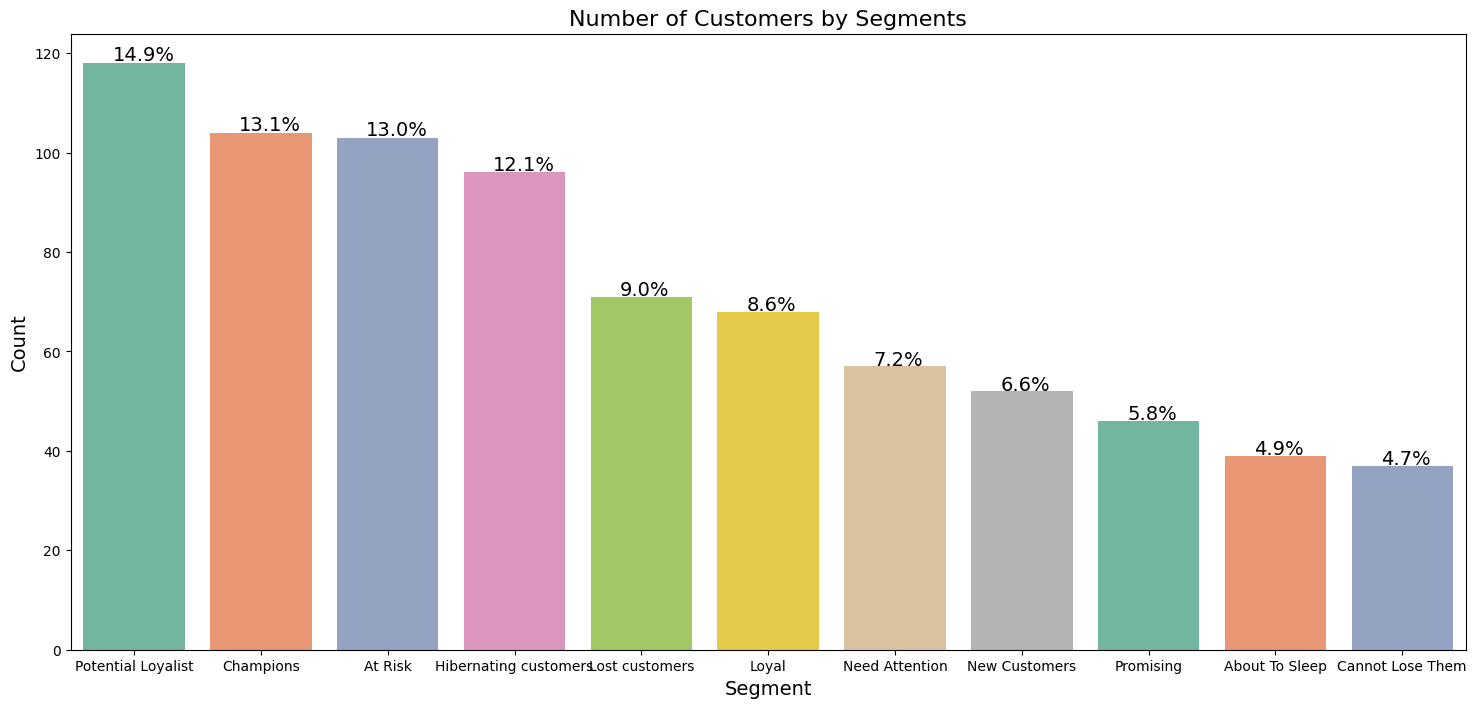

In [42]:
plt.figure(figsize = (18, 8))
ax = sns.countplot(data = RFM_score_table,
                   x = 'Segment',
                   order = RFM_score_table['Segment'].value_counts().index,
                   palette = 'Set2')
total = len(RFM_score_table.Segment)
for patch in ax.patches:
    percentage = '{:.1f}%'.format(100 * patch.get_height()/total)
    x = patch.get_x() + patch.get_width() / 2 - 0.17
    y = patch.get_y() + patch.get_height() * 1.005
    ax.annotate(percentage, (x, y), size = 14)
plt.title('Number of Customers by Segments', size = 16)
plt.xlabel('Segment', size = 14)
plt.ylabel('Count', size = 14)
plt.xticks(size = 10)
plt.yticks(size = 10)
plt.show()

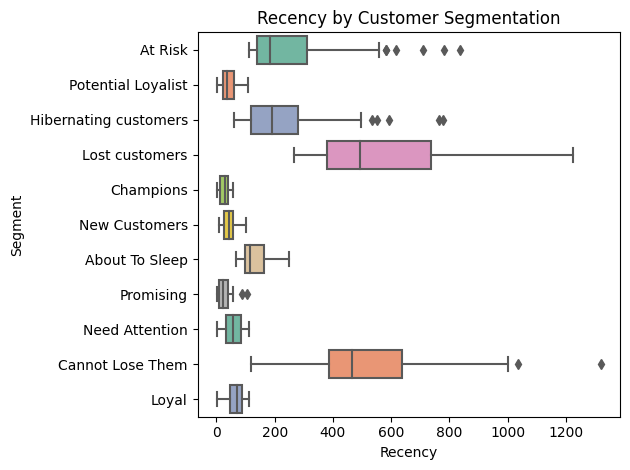

In [43]:
sns.boxplot(data = RFM_score_table, x = 'Recency', y = 'Segment', palette= "Set2")
plt.title("Recency by Customer Segmentation")
plt.tight_layout()
plt.show()

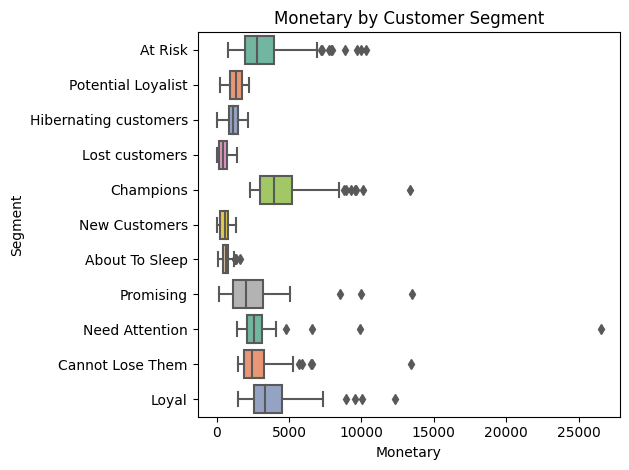

In [46]:
sns.boxplot(data = RFM_score_table, x = 'Monetary', y = 'Segment', palette= "Set2")
plt.title("Monetary by Customer Segment")
plt.tight_layout()
plt.show()

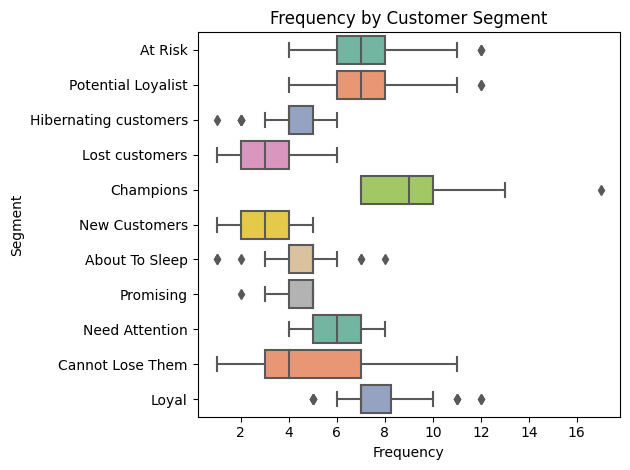

In [47]:
sns.boxplot(data = RFM_score_table, x = 'Frequency', y = 'Segment', palette= "Set2")
plt.title("Frequency by Customer Segment")
plt.tight_layout()
plt.show()

#7. Suggest recommendation for marketing team to target customers in campaign


The potential customer segments for the company's marketing campaign are as follows:

**1. Potential Loyalist**: This customer segment represents the largest portion of customers (14.9%), consisting of 118 customers who made their most recent purchases within 45 days (ranked 5th). Although they contribute a relatively small revenue of $1,345.49, the marketing team should consider implementing cross-selling strategies for this customer segment.

**2. Champion**: The second-largest customer segment (13.1%) includes 104 customers who made their most recent purchases within 27 days (ranked 2nd). They contribute the highest average revenue of $4,435.91. This segment consists of customers who make frequent purchases, so there should be priority customer care programs for this segment, such as product discounts.

**3. Loyal**: This customer segment has a relatively low proportion (8.6%) with an average purchase frequency of 7.7 days, but they contribute the second-highest revenue of $3,948.21. To further assess the products for this segment, conducting product evaluation surveys is recommended in order to create suitable cross-selling and up-selling programs.

**4. Cannot Lose Them:** This customer segment has the lowest proportion (4.7%), but they have a higher purchase frequency than the "Loyal" segment (4.78 > 7.75). However, these customers made transactions 265 days ago. Therefore, new campaign strategies based on rewards, discounts, and special incentives for this customer group can be planned to attract and retain them. These strategies could be designed to make them feel special and appealing, ultimately encouraging their loyalty.

